# Introduction

The three business questions that I focused in this analysis are:
1. What is the differences in listing prices among different neighborhood?
2. How do listing prices change during the year?
3. How should you price your listing based on location and room type?

# Import Libraries and Data

In [1]:
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

In [2]:
# Import Data
listings_df = pd.read_csv('listings.csv') 
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv') #didn't use in this exercise

# Data exploration

Start with exploring the data and data type for each dataset.

## Data info

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [8]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB



## Data Preprocessing

From the information above, the data will need some data-preprocessing:
1. Find the missing values for each dataset.
2. We can merge the listings and calendar to get the complete daily listing list over the year. 
3. Select relevant columns for the analysis
4. Convert price to float and convert datetime to month and year
5. Recode the zipcode to neighbourhood
6. Clean the missing values

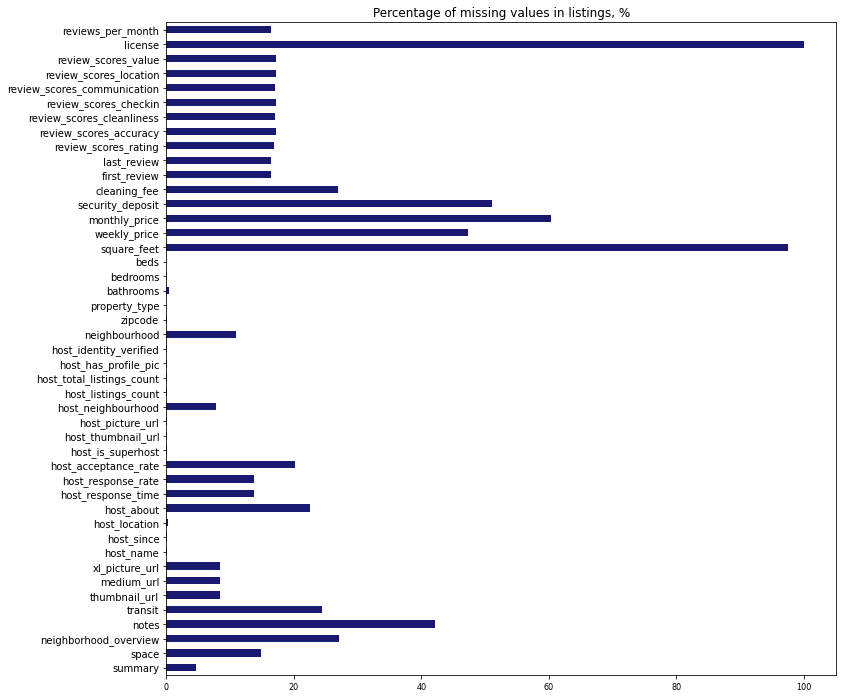

In [9]:
#find percentage of missing values for each column
listings_missing_df = listings_df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
plt.figure(figsize = (12, 12)) #determine the size of the chart
listings_columns_with_nan.plot.barh(title='Percentage of missing values in listings, %', color = "midnightblue")
plt.xticks(fontsize = 8) # format the labels for the x-axis
plt.yticks(fontsize = 10) # format the y-axis

plt.show()

In [10]:
# Find missing values in calendar
calendar_df.isnull().mean().sort_values(ascending=False)#rank the most missing values

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [11]:
# FInd missing values in reviews
reviews_df.isnull().mean().sort_values(ascending=False)#rank the most missing values

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In the analysis of missing values, we can identify that there are over 80% of missing values in the columns 'square feet' and 'license'. Those two won't be useful for our analysis. Also, there are about 30% of missing values in the column 'price' in the calendar dataset. These need to be cleaned as well since 'price' will be our dependent variables for exploration analysis and future prediction models. 

Then let's take a look at the information for some of those columns to find the appropriate columns for our neighborhood comparison. I am specifically interested in the columns related to 'zipcode' and 'neighborhood'.

From the information below, the neighborhood infomation contained in the dataset are not complete with a significant portion of rows labeled as others, which will not be useful for our analysis. But we do have a very complete record of the zipcode information for the listing. This can be more useful for following analysis. 

In [12]:
listings_df.zipcode.value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: zipcode, dtype: int64

In [13]:
listings_df.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

### Merge and select datasets

Listing information and listing calendar information are merged to provide a full picture of the listing information throughout the year. 

In [14]:
#merge datasets
listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})
df_merged = pd.merge(calendar_df, listings_df, on = 'listing_id')

In [15]:
df_merged.columns

Index(['listing_id', 'date', 'available', 'price_x', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [16]:
#select the relevant columns for analysis
df_selected = df_merged[['listing_id', 'date', 'price_x','zipcode','property_type','room_type', 'accommodates', 'bathrooms', 'bedrooms', 
               'beds', 'bed_type']]

In [17]:
df_selected.head()

,listing_id,date,price_x,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type
0,241032,2016-01-04,$85.00,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed
1,241032,2016-01-05,$85.00,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed
2,241032,2016-01-06,NaN,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed
3,241032,2016-01-07,NaN,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed
4,241032,2016-01-08,NaN,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed


### Clean data

First, convert price to float and convert datetime to month and year so it is easier for future analysis. Then, all the zipcode information were recoded to neighbourhood based on the Seattle neighbourhood map. 
Lastly, drop all the missing values in the dataset. 

In [18]:
#convert price_x to float
pd.options.mode.chained_assignment = None  # default='warn'
df_selected['price_x'] = df_selected['price_x'].astype(str)
df_selected['price'] = df_selected['price_x'].str.replace('[$, ]','').astype('float')
df_selected = df_selected.drop(columns = ['price_x'])

In [19]:
#convert date from the calendar into month and drop the date colum
def get_month_from_date(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

def get_year_from_date(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])
df_selected['month'] = df_selected.apply(lambda row: get_month_from_date(row),axis=1)
df_selected['year'] = df_selected.apply(lambda row: get_year_from_date(row),axis=1)
df_selected = df_selected.drop(columns = ['date'])

#select data from 2016
df_selected_2016 = df_selected.iloc[:-2,:] 
df_selected_2016

,listing_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,month,year
0,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
1,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
2,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2016
3,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2016
4,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1393563,10208623,98109,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,12,2016
1393564,10208623,98109,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,12,2016
1393565,10208623,98109,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,12,2016
1393566,10208623,98109,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,12,2016


In [20]:
# Recode zipcode to neighbourhood
def neighbourhood(value):
    if value in ['98177', '98133', '98117', '98103', '98107']:
        return 'Northwest Seattle'
    elif value in ['98125','98105', '98115']:
        return 'Northeast Seattle'
    elif value in ['98199', '98119', '98109']:
        return 'Magnolia&Queen Anne'
    elif value in ['98122', '98112', '99\n98122','98102']:
        return 'Central Seattle'
    elif value in ['98121', '98101', '98104', '98134']:
        return 'Downtown Seattle'
    elif value in ['98144', '98108', '98118', '98178']:
        return 'Southeast Seattle'
    elif value in ['98116', '98136', '98126', '98106','98146']:
        return 'West Seattle&Delridge'
    return value

df_selected_2016['zipcode'] = df_selected_2016['zipcode'].apply(neighbourhood)
df_selected.rename(columns={'zipcode': 'neighbourhood'})

,listing_id,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,month,year
0,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
1,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
2,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2016
3,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2016
4,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1393565,10208623,Magnolia&Queen Anne,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,12,2016
1393566,10208623,Magnolia&Queen Anne,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,12,2016
1393567,10208623,Magnolia&Queen Anne,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,12,2016
1393568,10208623,98109,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,NaN,1,2017


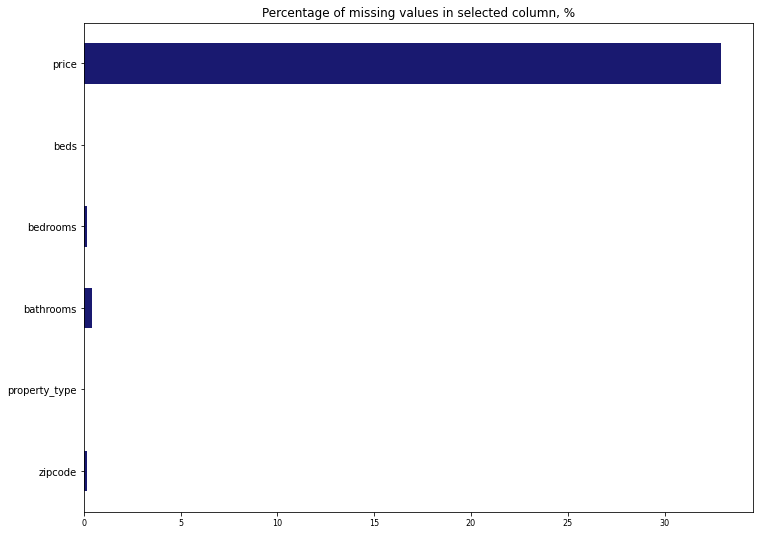

In [21]:
#find percentage of missing values for each column
df_selected_missing = df_selected_2016.isnull().mean()*100

#filter out only columns, which have missing values
df_selected_with_nan = df_selected_missing[df_selected_missing > 0]

#plot the results
plt.figure(figsize = (12, 9)) #determine the size of the chart
df_selected_with_nan.plot.barh(title='Percentage of missing values in selected column, %', color = "midnightblue")
plt.xticks(fontsize = 8) # format the labels for the x-axis
plt.yticks(fontsize = 10) # format the y-axis

plt.show()

In [22]:
#drop the missing values
df_selected_2016_cleaned = df_selected_2016.dropna()
#check the percentage of the missing values dropped
(len(df_selected_2016)-len(df_selected_2016_cleaned))/len(df_selected_2016)*100

33.53930342832212

# Data Evaluation
## Comparison of Neighbourhood

In this section, the total number of listings and average price of listings in each neighbourhood are compared. It provides some insight about how listing price and number changed based on location.

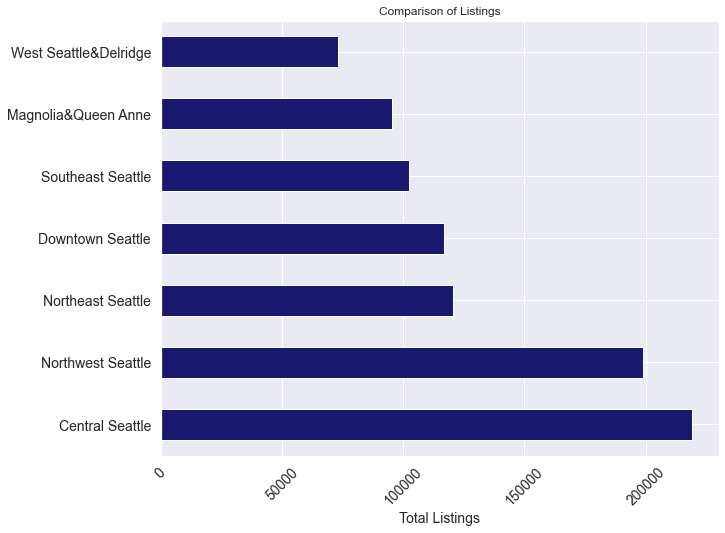

In [59]:
#calculate the total count of listings in each neighbourhood
df_neighbourhood_count = df_selected_2016_cleaned['zipcode'].value_counts()

#plot the results
plt.figure(figsize = (10, 8)) #determine the size of the chart
df_neighbourhood_count.plot.barh(title='Comparison of Listings', color = "midnightblue")
plt.xticks(rotation = 45, fontsize = 14) # format the labels for the x-axis
plt.yticks(fontsize = 14) # format the y-axis
plt.xlabel("Total Listings",fontsize = 14)

plt.savefig('comparison of total listings.png')

plt.show()

No handles with labels found to put in legend.


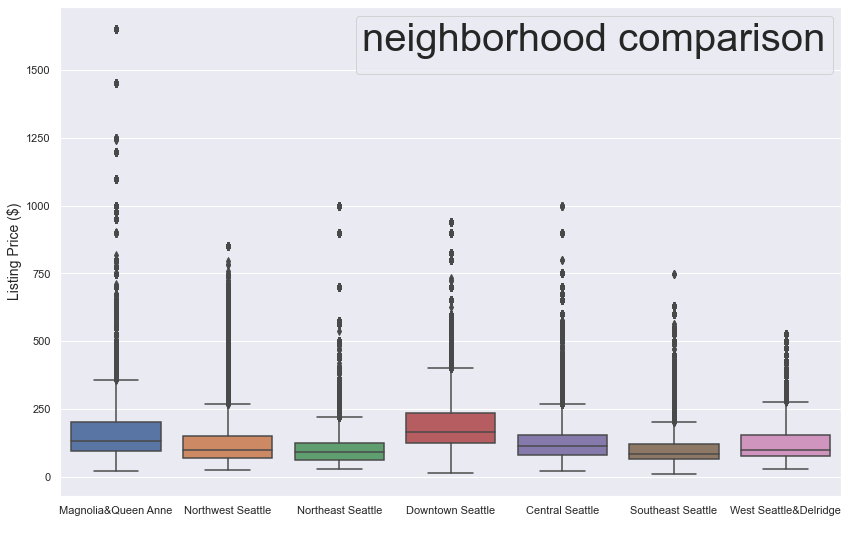

In [24]:
#plot the listing price distribution in each neighbourhood
sns.set(rc={'figure.figsize':(14,9)})
ax = sns.boxplot(x = df_selected_2016_cleaned['zipcode'], y = df_selected_2016_cleaned['price'])
plt.legend(title = 'neighborhood comparison', fontsize='x-large', title_fontsize='40')
plt.xlabel(" ")
plt.ylabel("Listing Price ($)",fontsize = 14)
plt.savefig('pricing comparison for neighbourhood.png')

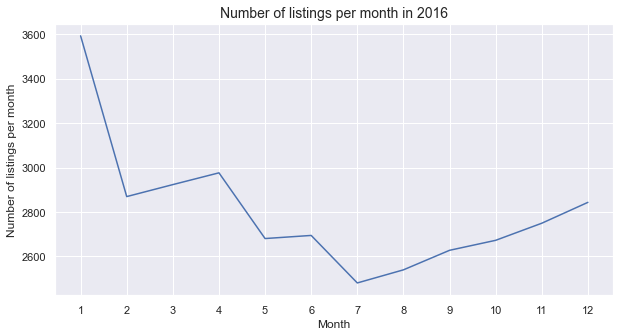

In [25]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(df_selected_2016_cleaned[(df_selected_2016_cleaned['month'] == i)]['listing_id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot the number of listings per month in 2016
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings per month')
plt.xlabel('Month')
plt.title('Number of listings per month in 2016', fontsize = 14)

plt.savefig('number of available listings.png')

plt.show()

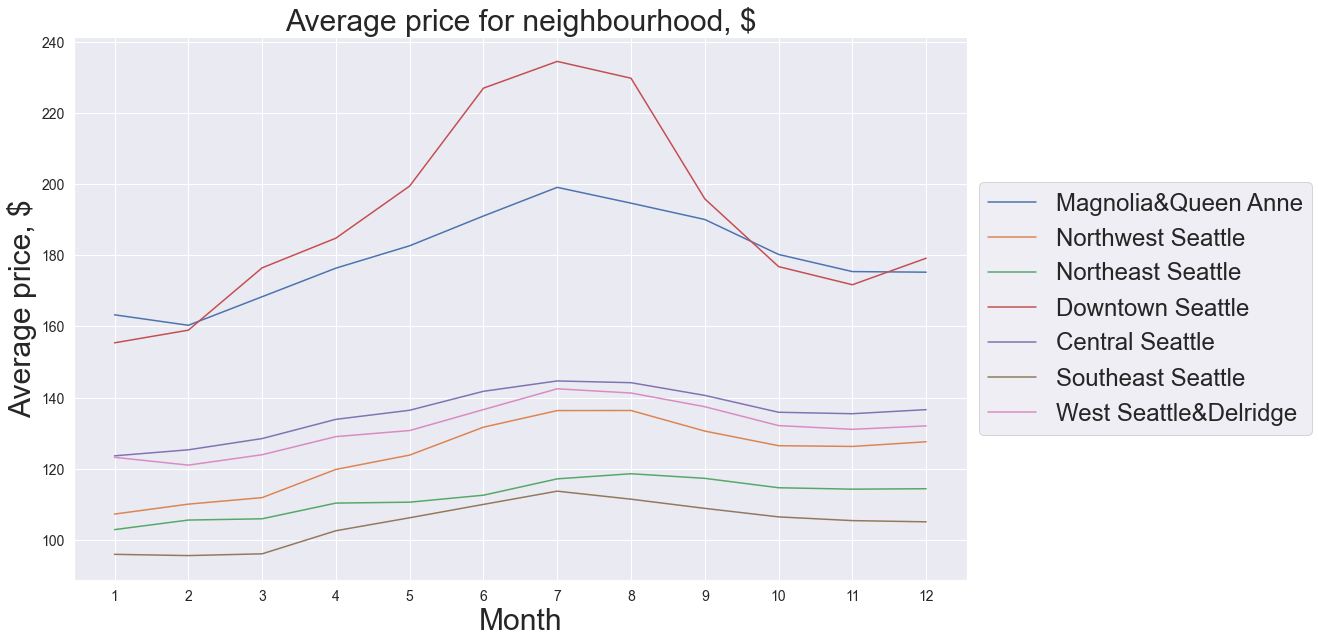

In [63]:
#get list of neighbourhoods
neighbourhoods = df_selected_2016_cleaned['zipcode'].unique()

#get prices by month and neighbourhood
price_by_month_neighbourhood = df_selected_2016_cleaned.groupby(['month','zipcode']).mean().reset_index()

#plot prices for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['zipcode'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['zipcode'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 24)

plt.ylabel('Average price, $', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.title('Average price for neighbourhood, $', fontsize = 30)
plt.xticks(np.arange(1, 13, step=1),fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('average price for neighbourhood.png')

plt.show()

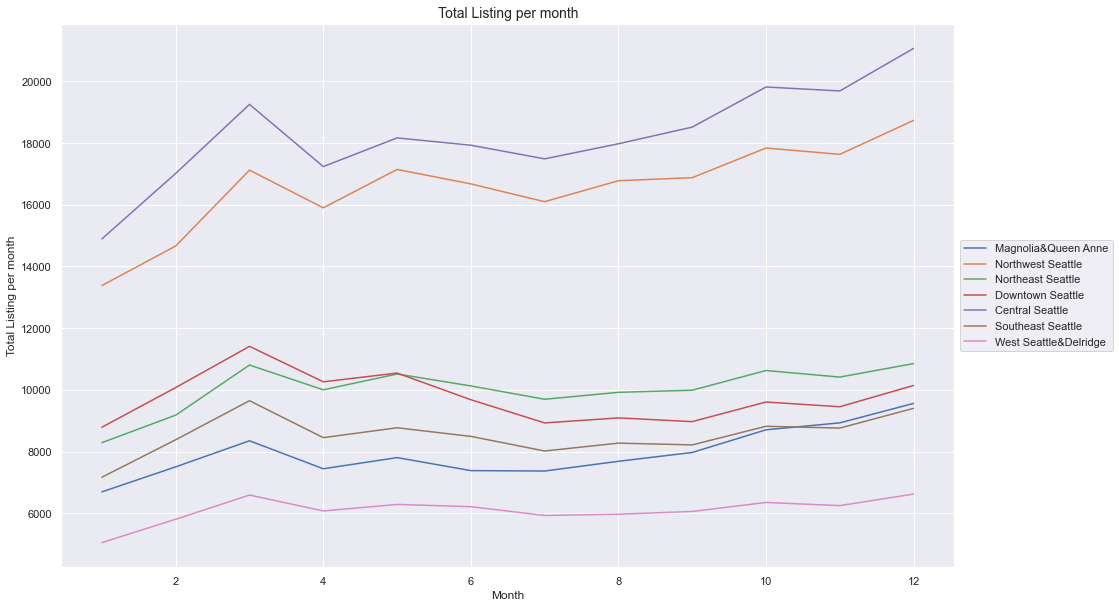

In [27]:
#get list of neighbourhoods
neighbourhoods = df_selected_2016_cleaned['zipcode'].unique()

#get total listing by month and neighbourhood
listing_by_month_neighbourhood = df_selected_2016_cleaned.groupby(['month','zipcode']).count().reset_index()
listing_by_month_neighbourhood
#plot total listing for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(listing_by_month_neighbourhood[listing_by_month_neighbourhood['zipcode'] == neighbourhood]['month'],
             listing_by_month_neighbourhood[listing_by_month_neighbourhood['zipcode'] == neighbourhood]['listing_id'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Total Listing per month')
plt.xlabel('Month')
plt.title('Total Listing per month', fontsize = 14)

plt.savefig('Total Listing per month.png')

plt.show()

# Price Prediction Model

The data is preprocessed as followed:
1. Recode the property_type and bed_type to simplify the model based on the number of each type and the average price of each type.
2. Remove the year column since it won't provide any useful information for the model prediction

In [28]:
#make a copy of the clean dataset for prediction
df_predict = df_selected_2016_cleaned.copy()

In [29]:
df_predict.head()

,listing_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,month,year
0,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
1,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
9,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
10,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016
14,241032,Magnolia&Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,1,2016


In [30]:
df_predict['property_type'].value_counts()

House              432630
Apartment          404629
Townhouse           27155
Condominium         19226
Loft                 9891
Bed & Breakfast      9860
Other                6611
Cabin                5082
Camper/RV            3423
Bungalow             3307
Boat                 1910
Tent                  874
Treehouse             673
Dorm                  426
Chalet                301
Yurt                  177
Name: property_type, dtype: int64

In [31]:
df_predict['room_type'].value_counts()

Entire home/apt    588098
Private room       303315
Shared room         34762
Name: room_type, dtype: int64

In [32]:
df_predict['bed_type'].value_counts()

Real Bed         886473
Futon             18379
Pull-out Sofa     12505
Airbed             6005
Couch              2813
Name: bed_type, dtype: int64

In [33]:
df_predict.groupby(['bedrooms']).mean(['price']).sort_values(['price'])

,listing_id,accommodates,bathrooms,beds,price,month,year
bedrooms,,,,,,,
1.0,5.322502e+06,2.472279,1.109319,1.277321,101.172341,6.609084,2016.005948
0.0,6.086242e+06,2.487106,0.992086,1.252038,112.121687,6.683648,2016.006286
2.0,5.193395e+06,4.935582,1.441438,2.562766,198.436369,6.708172,2016.006065
3.0,4.910416e+06,6.604056,2.095689,3.518298,288.734121,6.929634,2016.006898
4.0,5.481618e+06,8.613455,2.607492,4.788058,326.068262,7.131343,2016.008636
7.0,5.022572e+06,16.000000,4.000000,10.000000,557.754839,6.887097,2016.006452
5.0,6.089300e+06,10.978470,3.338440,6.146406,569.977145,6.861709,2016.006459
6.0,2.279246e+06,13.327493,3.139151,8.935310,658.550539,7.105121,2016.006065


In [34]:
df_predict.groupby(['bed_type']).mean(['price']).sort_values(['price'])

,listing_id,accommodates,bathrooms,bedrooms,beds,price,month,year
bed_type,,,,,,,,
Couch,5.273071e+06,2.194099,1.059189,1.109492,1.239246,63.266619,6.858514,2016.007821
Futon,4.761296e+06,1.952881,1.037733,0.935470,1.048262,73.240546,6.747484,2016.006529
Pull-out Sofa,5.044822e+06,2.381208,1.091843,0.811835,1.259656,91.275010,6.558737,2016.005598
Airbed,6.170314e+06,2.205828,1.134305,1.108743,1.179017,101.722065,6.670108,2016.006162
Real Bed,5.355849e+06,3.369188,1.266876,1.300179,1.757362,140.401771,6.662303,2016.006094


In [35]:
# Recode property_type
def property_type(value):
    if value in ['House', 'Townhouse', 'Loft']:
        return 'House'
    elif value in ['Apartment', 'Condominium', 'Chalet', 'Bed & Breakfast']:
        return 'Apartment/Condo'
    elif value in ['Camper/RV', 'Bungalow', 'Cabin']:
        return 'Outdoor_Room'
    elif value in ['Tent', 'Treehouse', 'Dorm', 'Yurt']:
        return 'Outdoor_Tent'
    return value

df_predict['property_type'] = df_predict['property_type'].apply(property_type)

In [36]:
# Recode bed_type
def bed_type(value):
    if value in ['Real Bed','Airbed']:
        return 'Bed'
    elif value in ['Futon','Pull-out Sofa','Couch']:
        return 'Futon/Sofa/Couch'
    return value

df_predict['bed_type'] = df_predict['bed_type'].apply(bed_type)

In [37]:
df_predict.head()

,listing_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,month,year
0,241032,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,85.0,1,2016
1,241032,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,85.0,1,2016
9,241032,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,85.0,1,2016
10,241032,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,85.0,1,2016
14,241032,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,85.0,1,2016


In [38]:
df_predict_re = df_predict[['zipcode','property_type','room_type',
                           'accommodates','bathrooms','bedrooms',
                           'beds','bed_type','month','price']]
df_predict_re.head()

,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,month,price
0,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,1,85.0
1,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,1,85.0
9,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,1,85.0
10,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,1,85.0
14,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,4,1.0,1.0,1.0,Bed,1,85.0


### Set up parameters

Create dummy variables for categorical data and split the test/train dataset.

In [39]:
#select X,Y data
X = df_predict_re.iloc[:,:-1]
Y = df_predict_re.iloc[:,-1]

In [40]:
# select non-numeric variables and create dummies
non_num_vars = X.select_dtypes(include=['object']).columns
X[non_num_vars].head()

,zipcode,property_type,room_type,bed_type
0,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,Bed
1,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,Bed
9,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,Bed
10,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,Bed
14,Magnolia&Queen Anne,Apartment/Condo,Entire home/apt,Bed


In [41]:
# create dummy variables
dummy_vars = pd.get_dummies(X[non_num_vars])
dummy_vars

,zipcode_Central Seattle,zipcode_Downtown Seattle,zipcode_Magnolia&Queen Anne,zipcode_Northeast Seattle,zipcode_Northwest Seattle,zipcode_Southeast Seattle,zipcode_West Seattle&Delridge,property_type_Apartment/Condo,property_type_Boat,property_type_House,property_type_Other,property_type_Outdoor_Room,property_type_Outdoor_Tent,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Bed,bed_type_Futon/Sofa/Couch
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
9,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
10,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
14,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393207,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1393208,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1393211,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1393212,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [42]:
# drop non-numeric variables and add the dummies
X_dummy = X.drop(non_num_vars,axis=1)
X_dummy = pd.merge(X_dummy,dummy_vars, left_index=True, right_index=True)
X_dummy.head()

,accommodates,bathrooms,bedrooms,beds,month,zipcode_Central Seattle,zipcode_Downtown Seattle,zipcode_Magnolia&Queen Anne,zipcode_Northeast Seattle,zipcode_Northwest Seattle,...,property_type_Boat,property_type_House,property_type_Other,property_type_Outdoor_Room,property_type_Outdoor_Tent,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Bed,bed_type_Futon/Sofa/Couch
0,4,1.0,1.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,4,1.0,1.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
9,4,1.0,1.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
10,4,1.0,1.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14,4,1.0,1.0,1.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [43]:
#split the test and train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size = 0.2, random_state = 0)

## Random Forest Regression Model

In [44]:
# training the Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
RFregressor.fit(X_train, Y_train)

#calculate scores for the model
y_train_preds_RF = RFregressor.predict(X_train)
y_test_preds_RF = RFregressor.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_preds_RF),
        mean_squared_error(Y_test, y_test_preds_RF)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_preds_RF),
        r2_score(Y_test, y_test_preds_RF)))

Random Forest MSE train: 1533.705, test: 1583.223
Random Forest R^2 train: 0.861, test: 0.857


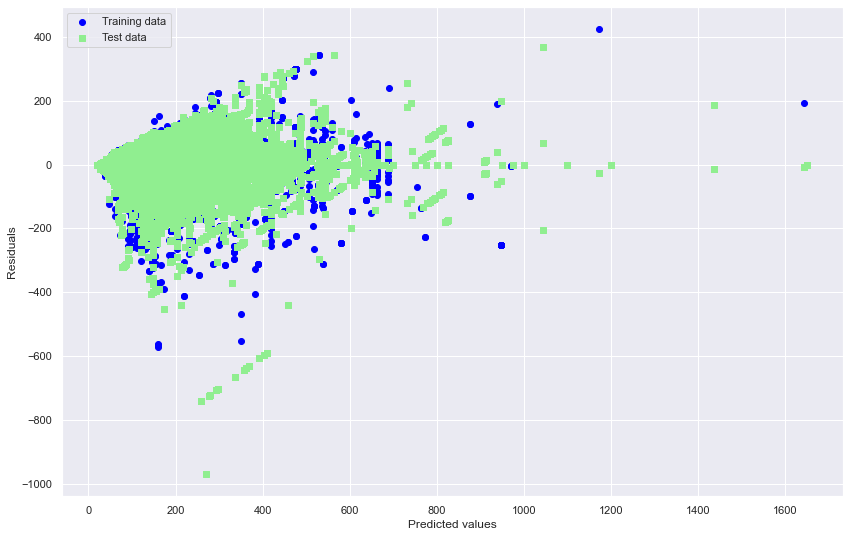

In [45]:
# show the residuals of train and test
plt.scatter(y_train_preds_RF,  y_train_preds_RF - Y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds_RF,  y_test_preds_RF - Y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

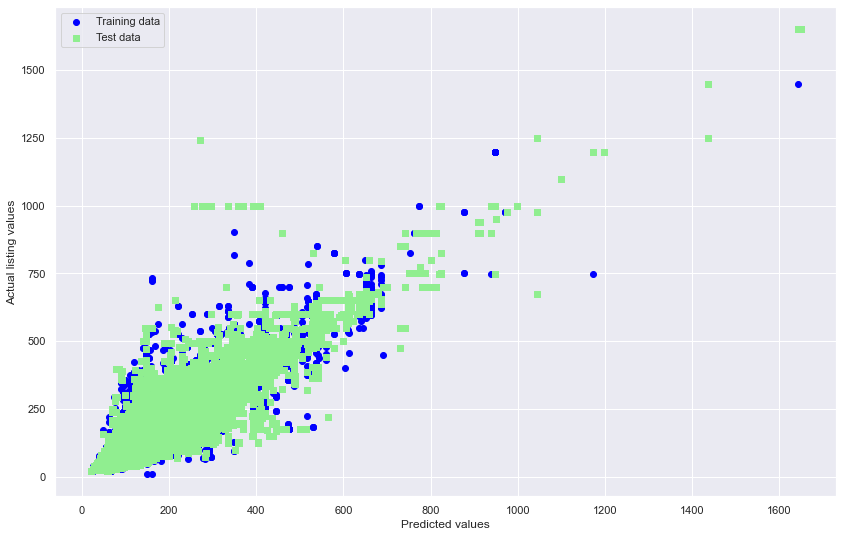

In [46]:
# show the comparison of actual and predict values
plt.scatter(y_train_preds_RF,  Y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds_RF,  Y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual listing values')
plt.legend(loc='upper left')
plt.show()

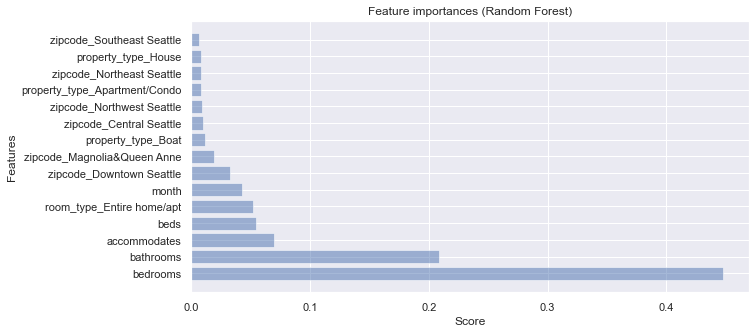

In [47]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, RFregressor.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.barh(y_pos, scores,align='center', alpha=0.5)
plt.yticks(y_pos, features)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

## Linear Regression model

In [48]:
#import linear regression model
from sklearn.linear_model import LinearRegression
LRregressor = LinearRegression()
LRregressor.fit(X_train, Y_train)

LinearRegression()

In [49]:
#calculate scores for the model
y_train_preds_LR = LRregressor.predict(X_train)
y_test_preds_LR = LRregressor.predict(X_test)

print('Linear Regression MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_preds_LR),
        mean_squared_error(Y_test, y_test_preds_LR)))
print('Linear Regression R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_preds_LR),
        r2_score(Y_test, y_test_preds_LR)))

Linear Regression MSE train: 4433.832, test: 4519.336
Linear Regression R^2 train: 0.599, test: 0.593


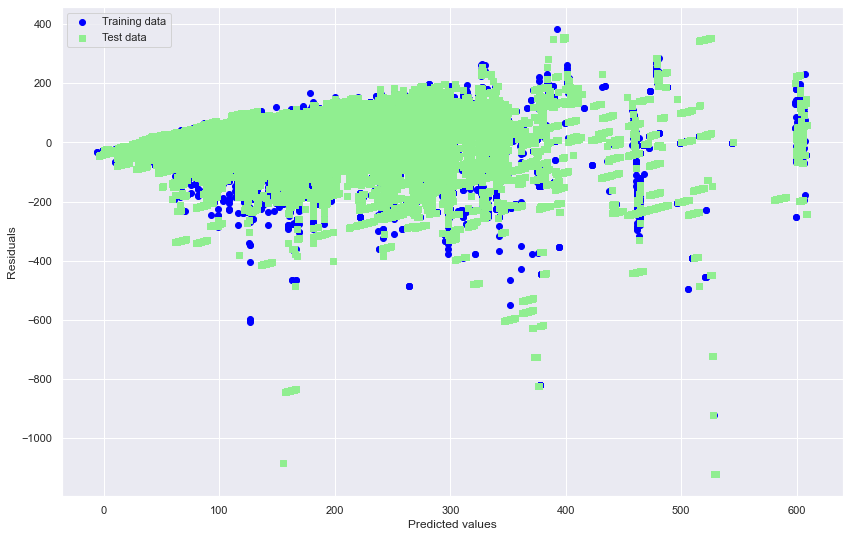

In [50]:
# show the residuals of train and test
plt.scatter(y_train_preds_LR,  y_train_preds_LR - Y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds_LR,  y_test_preds_LR - Y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

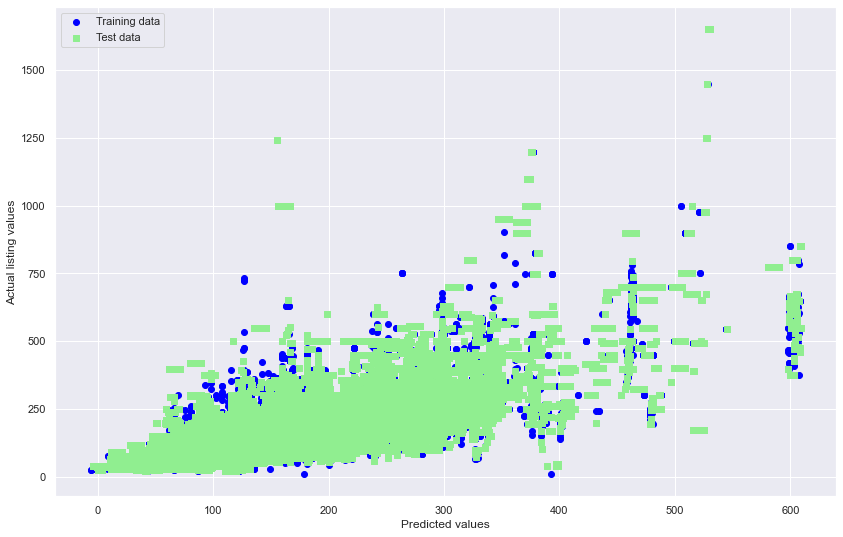

In [51]:
# show the comparison of predicted and actual values
plt.scatter(y_train_preds_LR,  Y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds_LR,  Y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual listing values')
plt.legend(loc='upper left')
plt.show()

From those two model performance above, Random Forest perform much better than Linear Regression model. Linear Regression modeling output were consistently lower than actual oberservation. 

## Make Prediction

In this section, input parameters were format in a way that is easier for the users to make their own prediction based on their own selection of input parameters. Random Forest model is used for prediction. 

In [52]:
#Check the required input
X_test.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'month',
       'zipcode_Central Seattle', 'zipcode_Downtown Seattle',
       'zipcode_Magnolia&Queen Anne', 'zipcode_Northeast Seattle',
       'zipcode_Northwest Seattle', 'zipcode_Southeast Seattle',
       'zipcode_West Seattle&Delridge', 'property_type_Apartment/Condo',
       'property_type_Boat', 'property_type_House', 'property_type_Other',
       'property_type_Outdoor_Room', 'property_type_Outdoor_Tent',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Bed', 'bed_type_Futon/Sofa/Couch'],
      dtype='object')

In [53]:
#Input list

#Room info:
accommodates = 6
bathrooms = 2
bedrooms = 3
beds = 3

#Month of Year:
#Select from 1 to 12
month = 7

#Location:
#Select one from the following and label 1 for the one selected
Central = 0
Downtown = 1
Magnolia_Queen_Anne = 0
Northeast = 0
Northwest = 0
Southeast = 0
West = 0

#Property type:
#Select one from the following and label 1 for the one selected
Apartment_Condo = 1
Boat = 0
House = 0
Other = 0
Outdoor_Room = 0
Outdoor_Tent = 0

#Room setup:
#Select one from the following and label 1 for the one selected
Entire_home_apt = 1
Private_room = 0
Shared_room = 0

#Bed type:
#Select one from the following and label 1 for the one selected
Bed_type_bed = 1
Bed_type_other = 0


Your_BNB = pd.DataFrame(np.array([[accommodates, bathrooms, bedrooms, beds, month, Central, Downtown, Magnolia_Queen_Anne, 
            Northeast, Northwest, Southeast, West, Apartment_Condo, Boat, House, Other, Outdoor_Room, 
            Outdoor_Tent, Entire_home_apt, Private_room, Shared_room, Bed_type_bed, Bed_type_other]]),
                        columns=['accommodates', 'bathrooms', 'bedrooms', 'beds', 'month',
                                 'zipcode_Central Seattle', 'zipcode_Downtown Seattle',
       'zipcode_Magnolia&Queen Anne', 'zipcode_Northeast Seattle',
       'zipcode_Northwest Seattle', 'zipcode_Southeast Seattle',
       'zipcode_West Seattle&Delridge', 'property_type_Apartment/Condo',
       'property_type_Boat', 'property_type_House', 'property_type_Other',
       'property_type_Outdoor_Room', 'property_type_Outdoor_Tent',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Bed', 'bed_type_Futon/Sofa/Couch'])

In [54]:
#predict price using random forest
Predict_price_RF = RFregressor.predict(Your_BNB)
print('Your AirBNB can be priced at $' + str(Predict_price_RF[0].round(2)) + ' based on our awesome Random Forest Model.')

Your AirBNB can be priced at $454.22 based on our awesome Random Forest Model.
